## What is a dollar worth today?

In economics, there are base years with which we make comparisons for current indicators like the Consumer Price Index (CPI). Often, one can see that 2012 is the chosen base year data, but what about past years? In this analysis we will be looking at what a 2000 and 2010 dollar is worth compared to today. For reference marks we will look at the average annual CPI for 2000 and 2010 to comapre to the annual CPI for 2020. From this we can run some examples such as salary amounts and home sales price amounts and see what those are in <i>real</i> 2000 dollars and <i>real</i> 2010 dollars. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
# set up FRED with api key
key = "XXXXXXX"
from fredapi import Fred
fred = Fred(api_key=key)

In [2]:
cpiaucns = pd.DataFrame(fred.get_series('CPIAUCNS', observation_start='1/1/2000'))
cpiaucns.rename({0:'CPI'}, axis=1, inplace=True)
cpiaucns.reset_index(inplace=True)
cpiaucns.rename({'index':'date'}, axis=1, inplace=True)
cpiaucns['date'] = pd.to_datetime(cpiaucns['date'])

annual_cpi = cpiaucns['CPI'].groupby(cpiaucns['date'].dt.year).mean().reset_index()[:-1]

In [3]:
annual_cpi.head()

,date,CPI
0,2000,172.200000
1,2001,177.066667
2,2002,179.875000
3,2003,183.958333
4,2004,188.883333


In [4]:
annual_cpi.tail()

,date,CPI
16,2016,240.007167
17,2017,245.119583
18,2018,251.106833
19,2019,255.657417
20,2020,258.811167


In [5]:
annual_cpi['growth_from_2000'] = annual_cpi['CPI'].apply(lambda x: x / 172.2)
annual_cpi['2000 dollar worth'] = annual_cpi['growth_from_2000'].apply(lambda x: 1/x)
annual_cpi['growth_from_2010'] = annual_cpi['CPI'].apply(lambda x: x/218.0555)
annual_cpi['2010 dollar worth'] = annual_cpi['growth_from_2010'].apply(lambda x: 1/x)
annual_cpi['date'] = pd.to_datetime(annual_cpi['date'].astype(str), format='%Y')

In [6]:
annual_cpi

,date,CPI,growth_from_2000,2000 dollar worth,growth_from_2010,2010 dollar worth
0,2000-01-01,172.200000,1.000000,1.000000,0.789707,1.266292
1,2001-01-01,177.066667,1.028262,0.972515,0.812026,1.231488
2,2002-01-01,179.875000,1.044570,0.957331,0.824905,1.212261
3,2003-01-01,183.958333,1.068283,0.936082,0.843631,1.185353
4,2004-01-01,188.883333,1.096883,0.911674,0.866217,1.154445
5,2005-01-01,195.291667,1.134098,0.881758,0.895605,1.116563
6,2006-01-01,201.591667,1.170683,0.854202,0.924497,1.081669
7,2007-01-01,207.342417,1.204079,0.830510,0.950870,1.051669
8,2008-01-01,215.302500,1.250305,0.799805,0.987375,1.012787
9,2009-01-01,214.537000,1.245859,0.802659,0.983864,1.016400


In [7]:
salary_examples= [40000,65000,125000]
home_examples = [120000,175000,450000]


salary_examples = pd.DataFrame({'todays dollars':salary_examples})
salary_examples['real 2000 dollars'] = annual_cpi['growth_from_2000'][20] * salary_examples['todays dollars']
salary_examples['real 2010 dollars'] = annual_cpi['growth_from_2010'][20] * salary_examples['todays dollars']

home_examples = pd.DataFrame({'todays dollars':home_examples})
home_examples['real 2000 dollars'] = annual_cpi['growth_from_2000'][20] * home_examples['todays dollars']
home_examples['real 2010 dollars'] = annual_cpi['growth_from_2010'][20] * home_examples['todays dollars']

examples = pd.concat([salary_examples,home_examples],keys=['Salary','Home Price'],axis=0)

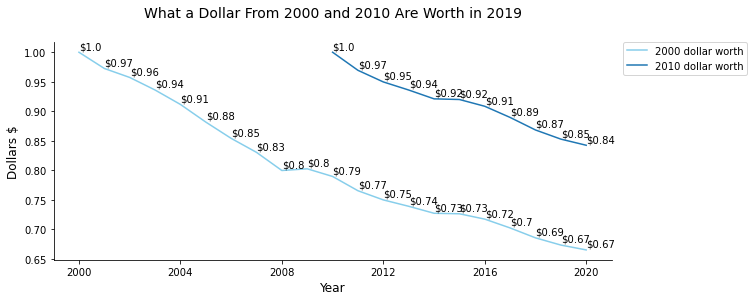

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
date = annual_cpi['date'].astype('O')
ax.plot(date, '2000 dollar worth', data=annual_cpi, color='skyblue')
ax.plot(date[10:], '2010 dollar worth', data=annual_cpi[10:])
lgd = ax.legend(loc=(1.02,0.85))
for i,j in zip(date,annual_cpi['2000 dollar worth']):
    ax.annotate('$' + str(round(j,2)), xy=(i,j+0.005))
for i,j in zip(date[10:],annual_cpi['2010 dollar worth'][10:]):
    ax.annotate('$' + str(round(j,2)), xy=(i,j+0.005))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Dollars $', size=12)
ax.set_xlabel('Year', size=12)
plt.title('What a Dollar From 2000 and 2010 Are Worth in 2019', pad=25, fontsize=14)
plt.savefig('D:\Trends\Inflation\inflationchart.png',bbox_inches='tight')
plt.show()


In [9]:
examples.style.format({"todays dollars": "${:20,.0f}", 
                          "real 2000 dollars": "${:20,.0f}", 
                          "real 2010 dollars": "${:20,.0f}"})

In the table above, a given value in the column 'todays value' is our comparison amount. The values in the columns 'real 2000 dollars' and 'real 2010 dollars' reflect the amount our comaprison value would equate to given the inflation rate between 2000 and 2020 and 2010 and 2020.

From the chart and example table above, you can see how the dollar vlaue in 2000 and 2010 has changed over the years. What was a dollar in 2000 is now \\$0.67 by the end of 2020 and a dollar in 2010 is now worth \\$0.84 by the end of 2020. Above is a table showing examples of salary and home price amounts in today's value as well as converted to show real 2000 dollars and real 2010 dollars. The difference is intriguing, year by year inflation may not seem to move but over longer periods of time the difference is significant. 

In [10]:
## create the dataframe with the 2000 median income from census 'https://www2.census.gov/programs-surveys/cps/tables/hinc-01/2001/new01_001.txt'
## snag current median income, best we have is the 2019 estimate released Sep 2020 at 68,703, however some concern on reporting during the pandemic was mentioned and potential real figures for 2019 could be 66,897

median_income = pd.DataFrame({'date':['1/1/2000','1/1/2019'],'median_income':[42151,68703]})
median_income['date'] = pd.to_datetime(median_income['date'])


## grab median new home prices
## these must be in todays dollars but no documentation found

median_home_price = pd.DataFrame(fred.get_series('MSPNHSUS', observation_start='1/1/2000')).reset_index()
median_home_price.rename({'index':'date1',0:'median_price'}, axis=1, inplace=True)
median_home_price = median_home_price.groupby(median_home_price['date1'].dt.year)['median_price'].mean()
median_want = median_home_price.iloc[pd.np.r_[0, 19]]
median_want = median_want.reset_index()


<ipython-input-10-7003c4499436>:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  median_want = median_home_price.iloc[pd.np.r_[0, 19]]


In [11]:
comparisons = pd.concat([median_income,median_want], axis=1)
comparisons.drop('date1',axis=1, inplace=True)
income_should_be = comparisons['median_income'][0] * annual_cpi['growth_from_2000'][19]
housing_should_be = comparisons['median_price'][0] * annual_cpi['growth_from_2000'][19]

print(income_should_be, '\n', housing_should_be)
data = pd.Series(data=[income_should_be, housing_should_be], index=range(0,2), name='expected_2019')
comparisons['date'] = comparisons['date'].astype(str)
comparisons = comparisons.merge(data, on=comparisons.index)
comparisons.drop('key_0', axis=1, inplace=True)

62579.65023180411 
 247256.74952009937


In [12]:
comparisons_2 = comparisons.copy()
comparisons_2['date'] = pd.to_datetime(comparisons_2['date']).dt.year.astype(str)
comparisons_2.loc[2,'median_income'] = comparisons.loc[0,'expected_2019']
comparisons_2.loc[2,'median_price'] = comparisons.loc[1,'expected_2019']
comparisons_2.loc[2,'date'] = 'Expected 2019'

comparisons_2.drop('expected_2019',axis=1, inplace=True)

def highlight_max(data, color='#fc4c4c'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

comparisons_2.style.format({"median_income": "${:20,.0f}", 
                          "median_price": "${:20,.0f}"}).hide_index().apply(highlight_max, subset='median_price')

date,median_income,median_price
2000,"$ 42,151","$ 166,542"
2019,"$ 68,703","$ 319,267"
Expected 2019,"$ 62,580","$ 247,257"


### Real World Insights

From the chart in the above cells we could see how the dollar amount from our base years deflated as inflation increased. <p>
The table below that chart showed example salaries and home prices adjusted in real 2000 and real 2010 numbers, essentially what those same prices from 2000 or 2010 would be today. This final table shows a very real situation in the United States. While median household income has proven to kept up with inflation, even surpassing it for 2019*, median newly constructed home prices have far surpassed the expected pricing compared to 2000. Based on inflation between 2000 and 2019, we would expect newly constructed home prices to come in at \$247,257, instead, the actual newly constructed median home price is 29\% higher than what would be expected. This higher price tag indicates that if the trend of home prices staying above inflation, without increased income, there is likely going to be an affordability crisis in the housing market.

<p>
*The Census statisticians have noted concerns on the 2019 reported figures. Due to the pandemic there could be some bias in reported figures as those with higher incomes could've been more likely to respond during the tumultuous year -- however they are confident incomes in 2019 were at about 4% higher than 2018.